In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import openrouteservice
from openrouteservice import convert
import folium
import json

KEY = "5b3ce3597851110001cf62488ce11ae3969f49228180ab51520db7f5"
client = openrouteservice.Client(key=KEY)

In [3]:
df = pd.read_csv("vehicle_route.csv")

In [4]:
df.head()

,sl.no,latitude,longitude,demand
0,0,8.503742,76.961613,0
1,1,8.493514,76.961011,14
2,2,8.491506,76.980696,17
3,3,8.504679,76.987161,10
4,4,8.509456,76.974030,8


In [5]:
locations = df[["latitude","longitude"]].to_numpy()

In [6]:
best_route = df["sl.no"].tolist()

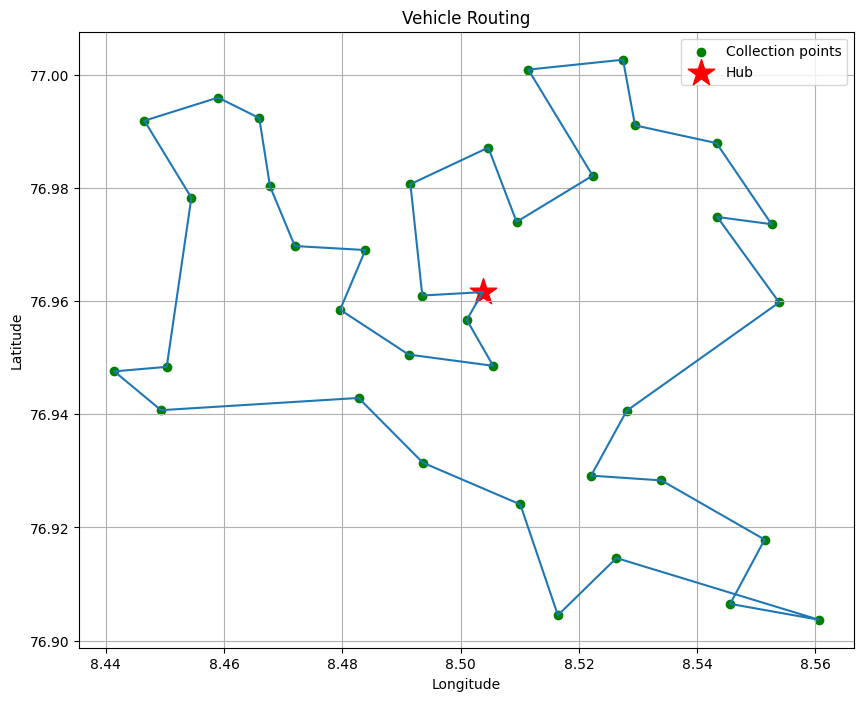

In [7]:
# Visualize the routes
plt.figure(figsize=(10, 8))
plt.plot(locations[:,0],locations[:,1])
plt.scatter(locations[:, 0], locations[:, 1], color='green', label='Collection points')
plt.scatter(locations[:, 0][0], locations[:, 1][0], color='red', s= 400, marker="*", label='Hub')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Routing')
plt.legend()
plt.grid(True)
plt.savefig("route.png")
plt.show()

In [8]:
coord = df[["longitude", "latitude"]].to_numpy().tolist()
res = client.directions(coord)
geometry = res['routes'][0]['geometry']
decoded = convert.decode_polyline(geometry)

distance_txt = "<h4> <b>Distance :&nbsp" + "<strong>"+str(round(res['routes'][0]['summary']['distance']/1000,1))+" Km </strong>" +"</h4></b>"
duration_txt = "<h4> <b>Duration :&nbsp" + "<strong>"+str(round(res['routes'][0]['summary']['duration']/3600,1))+" Hrs. </strong>" +"</h4></b>"

m = folium.Map(location=[8.51277207, 76.96247121],zoom_start=12, control_scale=True,tiles="OpenStreetMap")
folium.GeoJson(decoded).add_child(folium.Popup(distance_txt+duration_txt,max_width=300)).add_to(m)


In [9]:
for i in range(len(coord)):
    folium.Marker(
            location=list(coord[i][::-1]),
            popup=coord[i][::-1],
    ).add_to(m)

folium.Marker(
    location=list(coord[0][::-1]),
    popup="Central Hub",
    icon=folium.Icon(color="red", icon="home"),
).add_to(m)


m

In [10]:
m.save('route.html')

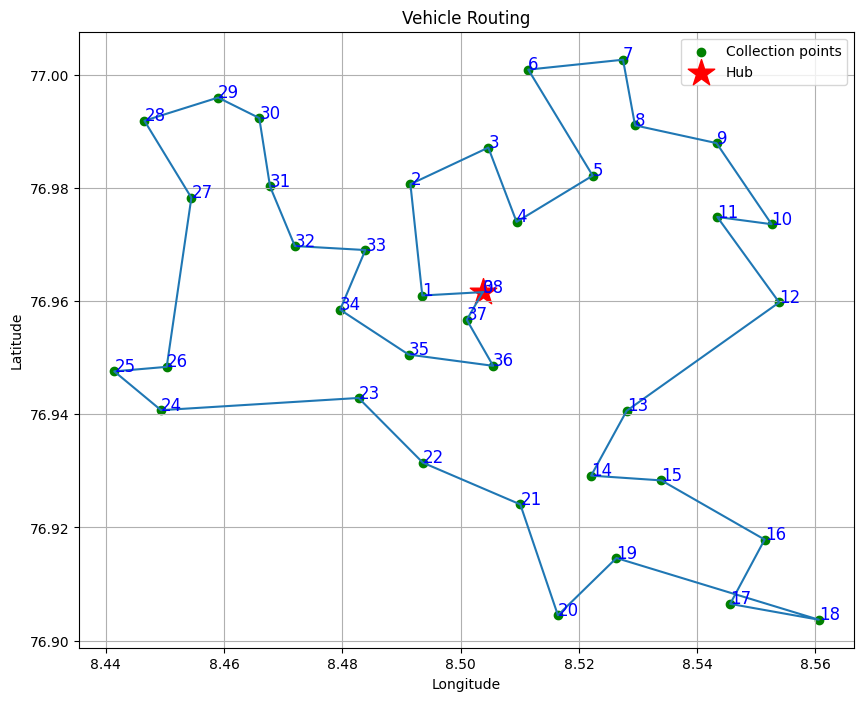

In [11]:
# Visualize the routes with serial numbers
plt.figure(figsize=(10, 8))
plt.plot(locations[:,0],locations[:,1])
plt.scatter(locations[:, 0], locations[:, 1], color='green', label='Collection points')
plt.scatter(locations[:, 0][0], locations[:, 1][0], color='red', s= 400, marker="*", label='Hub')
for i, txt in enumerate(range(len(locations))):
    plt.annotate(txt, (locations[:, 0][i], locations[:, 1][i]), fontsize=12, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Routing')
plt.legend()
plt.grid(True)
plt.savefig("route.png")
plt.show()


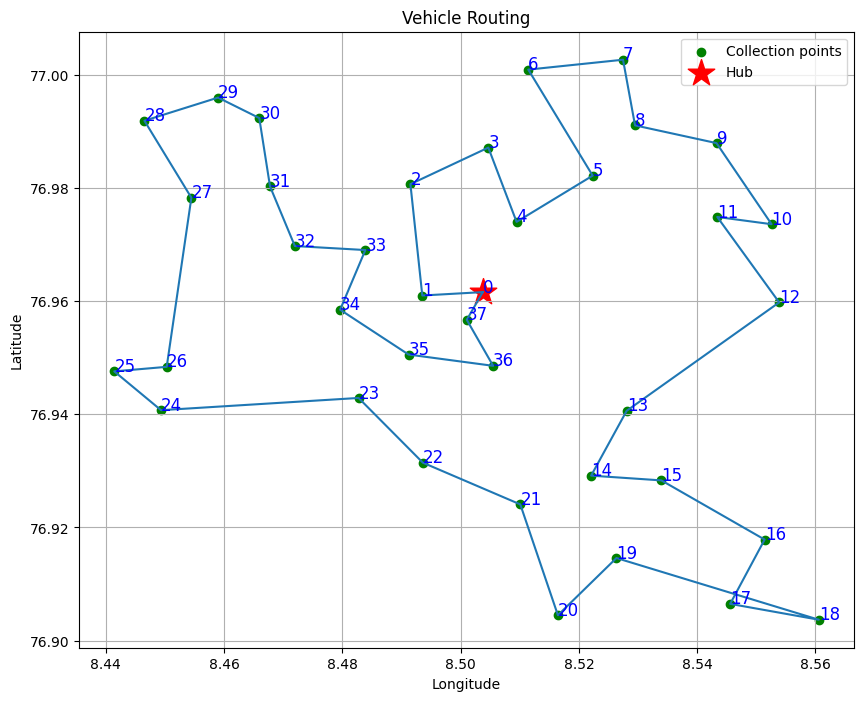

In [13]:
# Visualize the routes with serial numbers excluding the 38th node
plt.figure(figsize=(10, 8))
plt.plot(locations[:,0],locations[:,1])
plt.scatter(locations[:, 0], locations[:, 1], color='green', label='Collection points')
plt.scatter(locations[:, 0][0], locations[:, 1][0], color='red', s= 400, marker="*", label='Hub')
for i, txt in enumerate(range(len(locations))):
    if i != 38:  # Exclude the 38th node (Python uses 0-based indexing)
        plt.annotate(txt, (locations[:, 0][i], locations[:, 1][i]), fontsize=12, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Routing')
plt.legend()
plt.grid(True)
plt.savefig("route.png")
plt.show()


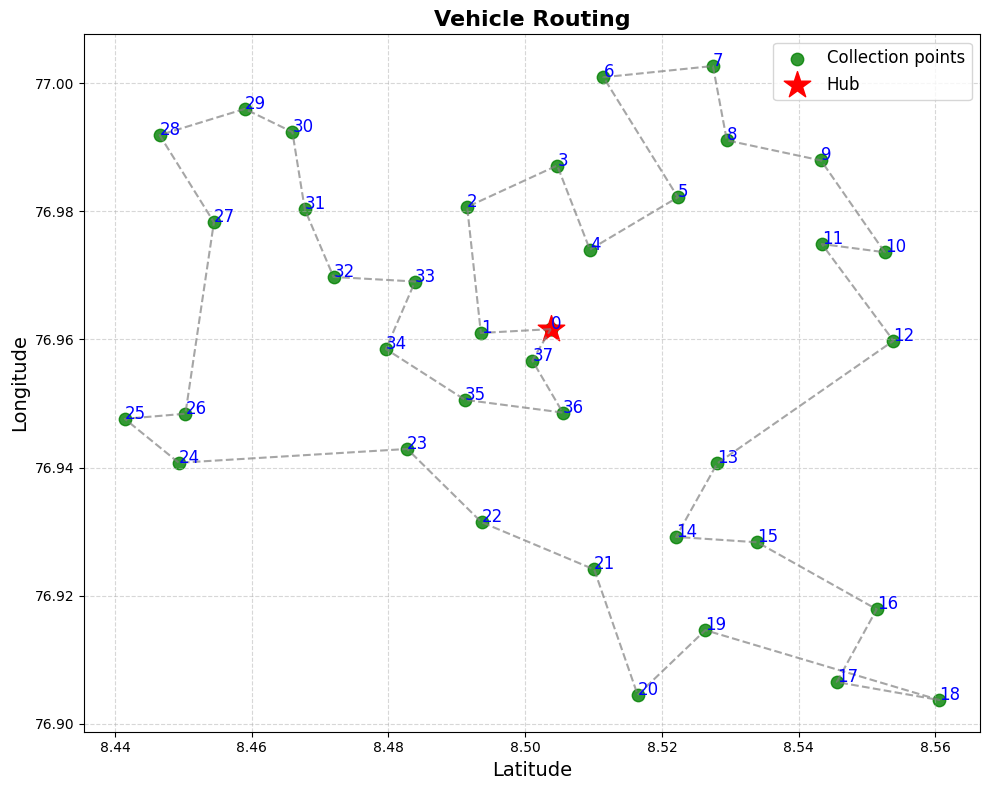

In [16]:
import matplotlib.pyplot as plt

# Visualize the routes with serial numbers excluding the 38th node
plt.figure(figsize=(10, 8))
plt.plot(locations[:,0],locations[:,1], color='grey', linestyle='--', alpha=0.7) # Plotting routes as dashed lines
plt.scatter(locations[:, 0], locations[:, 1], color='green', label='Collection points', s=80, alpha=0.8) # Scatter plot for collection points
plt.scatter(locations[:, 0][0], locations[:, 1][0], color='red', s=400, marker="*", label='Hub') # Hub point
for i, txt in enumerate(range(len(locations))):
    if i != 38:  # Exclude the 38th node (Python uses 0-based indexing)
        plt.annotate(txt, (locations[:, 0][i], locations[:, 1][i]), fontsize=12, color='blue') # Annotating collection points
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('Vehicle Routing', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5) # Adding grid lines
plt.tight_layout() # Adjust layout for better spacing
plt.savefig("route.png", dpi=300) # Save as high-resolution PNG
plt.show()
